In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.colors import LogNorm
from astropy.io import fits
import importlib

import statmorph
from statmorph.utils.image_diagnostics import make_figure
import utils.data
import utils.plots as plots
%matplotlib inline

----5-----


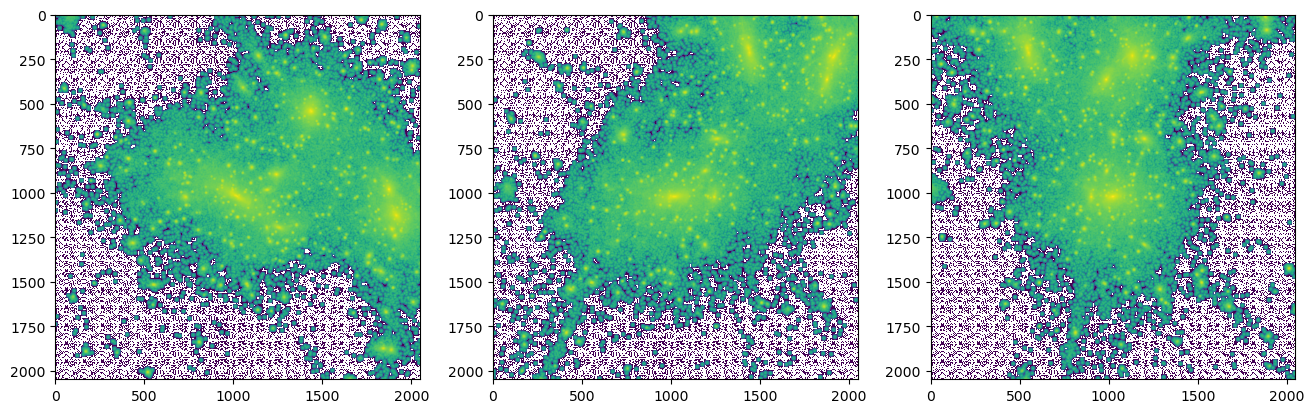

----6-----


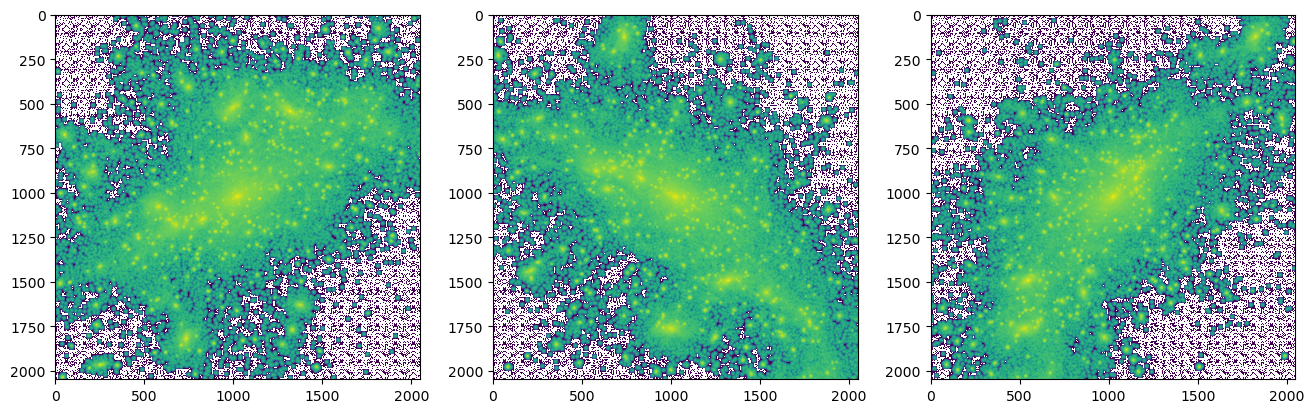

----7-----


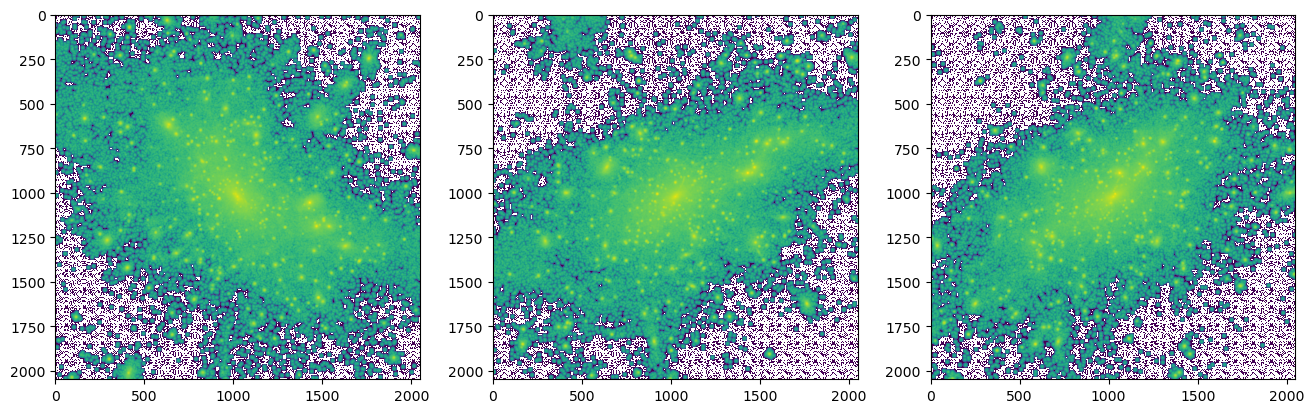

----8-----


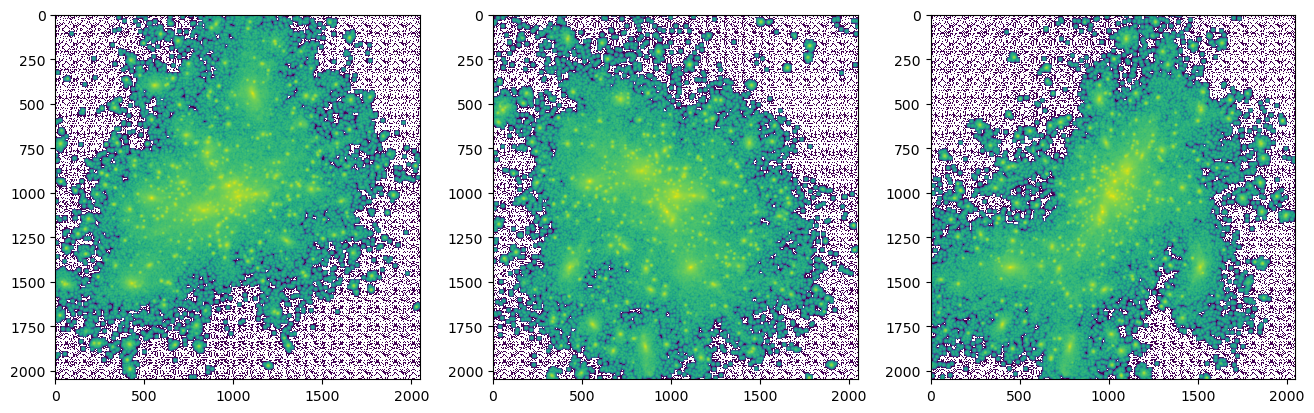

----9-----


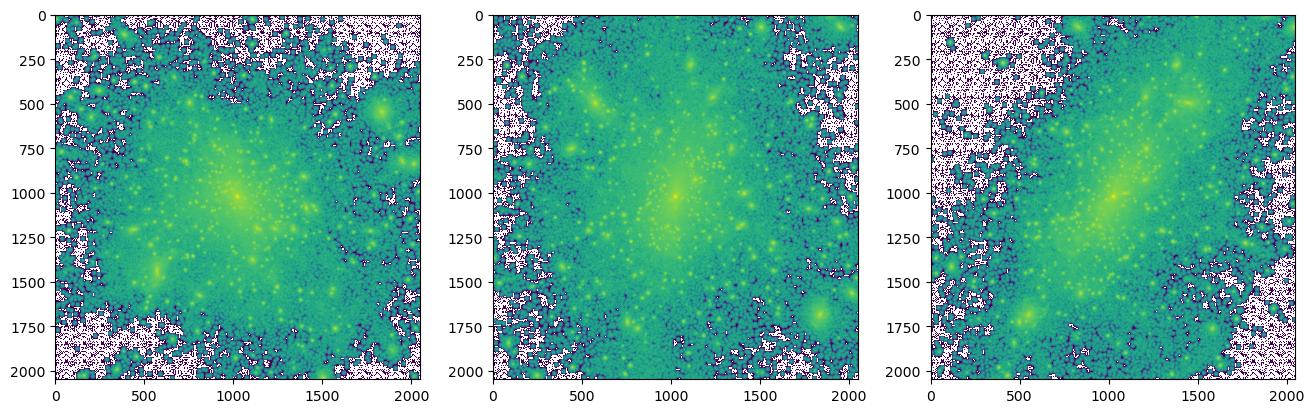

In [7]:
for fnum in np.arange(start=5, stop=10):
    print(str(fnum).center(10, '-'))
    bcg_file_0 = f'data/gadget3k_20/bcg_{str(fnum).zfill(4)}_125_0.fits'
    bcg_file_1 = f'data/gadget3k_20/bcg_{str(fnum).zfill(4)}_125_1.fits'
    bcg_file_2 = f'data/gadget3k_20/bcg_{str(fnum).zfill(4)}_125_2.fits'
    try:
        hdulist = fits.open(bcg_file_0)
    except: 
        continue
    bcg0 = hdulist[0].data
    hdulist = fits.open(bcg_file_1)
    bcg1 = hdulist[0].data
    hdulist = fits.open(bcg_file_2)
    bcg2 = hdulist[0].data
    fig, axs = plt.subplots(figsize=(16, 8), nrows=1, ncols=3)
    plots.display_img(image=bcg0, axs=axs[0])
    plots.display_img(image=bcg1, axs=axs[1])
    plots.display_img(image=bcg2, axs=axs[2])
    plt.show()

In [ ]:
bcg_file_0 = 'data/bcg_all/bcg_0001_125_0.fits'
bcg_file_1 = 'data/bcg_all/bcg_0001_125_1.fits'
bcg_file_2 = 'data/bcg_all/bcg_0001_125_2.fits'
hdulist = fits.open(bcg_file_0)
bcg0 = hdulist[0].data
hdulist = fits.open(bcg_file_1)
bcg1 = hdulist[0].data
hdulist = fits.open(bcg_file_2)
bcg2 = hdulist[0].data

In [ ]:
fig, axs = plt.subplots(figsize=(16, 8), nrows=1, ncols=3)
plots.display_img(image=bcg0, axs=axs[0])
plots.display_img(image=bcg1, axs=axs[1])
plots.display_img(image=bcg2, axs=axs[2])
plt.show()

In [ ]:
center = (len(bcg0[1])//2, len(bcg0[0])//2)
print(center)

NameError: name 'center' is not defined

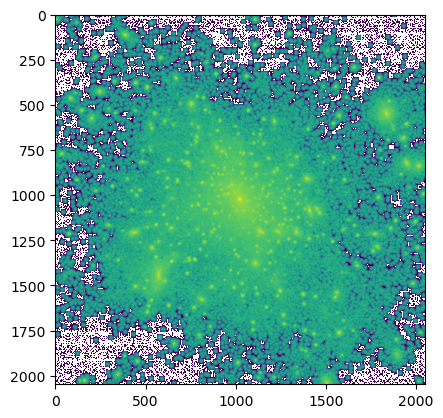

In [8]:
radius = 100
fig, axs = plt.subplots(nrows=1, ncols=1)
plots.display_img(image=bcg0,  axs=axs)
for scale in np.linspace(1, 10, num=5):
    circle = Circle((center[0], center[1]), radius*scale,
                    color='red', fill=False, linewidth=1.5)

    axs.add_patch(circle)
plt.show()

In [ ]:
morphs_list = []
for scale in np.linspace(1, 10, num=5):
    bcg_mask = utils.data.circular_mask(image=bcg0, image_center=center, 
                                    radius=scale*radius)
    morph = statmorph.source_morphology(image=bcg0, segmap=bcg_mask, gain=2.25)
    morphs_list.append(morph[0]) 

bcg0_df = utils.data.create_morph_df(
    morphs_list, name='results/bcg0.csv', save=True)
bcg0_df['radius'] = radius * np.linspace(1, 10, num=5)
bcg0_df.to_csv('results/bcg0.csv')

In [ ]:
morphs_list = []
for scale in np.linspace(1, 10, num=5):
    bcg_mask = utils.data.circular_mask(image=bcg1, image_center=center,
                                        radius=scale*radius)
    morph = statmorph.source_morphology(image=bcg1, segmap=bcg_mask, gain=2.25)
    morphs_list.append(morph[0])

bcg1_df = utils.data.create_morph_df(
    morphs_list, name='results/bcg1.csv', save=True)
bcg1_df['radius'] = radius * np.linspace(1, 10, num=5)
bcg1_df.to_csv('results/bcg1.csv')

In [ ]:
morphs_list = []
for scale in np.linspace(1, 10, num=5):
    bcg_mask = utils.data.circular_mask(image=bcg2, image_center=center,
                                        radius=scale*radius)
    morph = statmorph.source_morphology(image=bcg2, segmap=bcg_mask, gain=2.25)
    morphs_list.append(morph[0])

bcg2_df = utils.data.create_morph_df(
    morphs_list, name='results/bcg2.csv', save=True)
bcg2_df['radius'] = radius * np.linspace(1, 10, num=5)
bcg2_df.to_csv('results/bcg2.csv')

# Correlations

In [57]:
mah_df_list = []
for file in os.listdir('data/gadgetx3k_20/AHF_History/'):
    if '.dat' not in file:
        continue
    mah_file = 'data/gadgetx3k_20/AHF_History/' + file
    mah_df = pd.read_csv(mah_file, sep=r'\s+', index_col=False)
    mm0 = mah_df['Mvir(4)'].values/mah_df['Mvir(4)'][0]
    mm0 = pd.DataFrame(mm0)
    mm0.rename(columns={0: 'M/M0'}, inplace=True)
    mm0['Redshift'] = mah_df['Redshift(0)']
    mah_df_list.append(mm0)

/var/folders/s0/lggtcgss1ybb5pnxffm57clh0000gn/T/ipykernel_3714/440617994.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  mah_df = pd.read_csv(mah_file, sep=r'\s+', index_col=False)
/var/folders/s0/lggtcgss1ybb5pnxffm57clh0000gn/T/ipykernel_3714/440617994.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  mah_df = pd.read_csv(mah_file, sep=r'\s+', index_col=False)
/var/folders/s0/lggtcgss1ybb5pnxffm57clh0000gn/T/ipykernel_3714/440617994.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  mah_df = pd.read_csv(mah_file, sep=r'\s+', index_col=False)
/var/folders/s0/lggtcgss1ybb5pnxffm57clh0000gn/T/ipykernel_3714/440617994.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  

In [58]:
dsdf = pd.read_csv(
    'data/gadgetx3k_20/G3X_progenitors/DS_G3X_snap_128_center-cluster_progenitors.txt',
    sep=r'\s+', header=0)

int_columns = [0, 1, 2, 7]
column_names = dsdf.columns

for idx in range(len(column_names)):
    col_name = column_names[idx]
    if idx in int_columns:
        dsdf[col_name] = dsdf[col_name].astype(int)
    else:
        dsdf[col_name] = dsdf[col_name].astype(float)

In [59]:
dsdf = dsdf[:20]
dsdf

rID[0]           Hid[1]  DS_200[2]  eta_200[3]  delta_200[4]  fm_200[5]  \
0        1  128000000000001          0    1.113784      0.120344   0.191074   
1        2  128000000000001          0    1.072935      0.040830   0.112020   
2        3  128000000000001          0    0.989234      0.172955   0.328392   
3        4  128000000000001          0    1.121951      0.187624   0.219985   
4        5  128000000000001          0    1.686966      0.185922   0.231555   
5        6  128000000000001          0    3.430140      0.061293   0.132579   
6        7  128000000000001          0    1.162177      0.051286   0.105538   
7        8  128000000000001          0    1.000679      0.076452   0.337098   
8        9  128000000000001          1    1.066593      0.029855   0.077184   
9       10  128000000000001          0    1.863420      0.107988   0.172173   
10      11  128000000000001          0    0.966387      0.055608   0.375898   
11      12  128000000000001          0    1.079955      0.127441   0.191655   
12      13  128000000000001          0    1.016384      0.110570   0.190097   
13      14  128000000000001          0    1.245815      0.190176   0.249084   
14      15  128000000000001          0    1.457795      0.080710   0.135529   
15      16  128000000000001          0    1.995148      0.116729   0.210947   
16      17  128000000000001          0    0.986155      0.088016   0.273449   
17      18  128000000000001          0    1.019974      0.060614   0.130673   
18      19  128000000000001          0    1.142343      0.051644   0.136255   
19      20  128000000000002          0    1.058570      0.029555   0.101241   

    fm2_200[6]  DS_500[7]  eta_500[8]  delta_500[9]    fm_500[10]  \
0     0.057627          0    0.988455      0.125954  1.902216e+09   
1     0.036127          0    1.113930      0.038203  7.964150e+08   
2     0.214298          0    1.187227      0.047095  1.121146e+09   
3     0.059437          0    1.047104      0.165363  1.913957e+09   
4     0.109159          0    1.577747      0.254876  2.472550e+09   
5     0.023598          0    3.127402      0.070526  1.350470e+09   
6     0.025834          0    1.164290      0.056877  1.032488e+09   
7     0.082930          0    1.231865      0.097868  2.671051e+09   
8     0.008198          0    1.093629      0.008915  6.609273e+08   
9     0.075729          0    1.681465      0.115934  1.756544e+09   
10    0.141137          0    0.934960      0.090513  1.523061e+09   
11    0.035369          0    1.366319      0.151556  1.378254e+09   
12    0.056919          0    1.488160      0.136926  1.128911e+09   
13    0.117076          0    0.913567      0.224984  3.875983e+09   
14    0.019708          0    1.532213      0.101896  1.127976e+09   
15    0.043366          0    1.821905      0.116364  1.927956e+09   
16    0.187981          0    1.139895      0.028516  5.755866e+08   
17    0.062997          0    1.025678      0.025149  5.176863e+08   
18    0.023786          0    1.193008      0.005708  1.000094e+09   
19    0.018722          0    1.275874      0.053800  1.003825e+09   

     fm2_500[11]  
0   8.830347e+08  
1   1.933066e+08  
2   1.948033e+08  
3   9.464093e+08  
4   1.322065e+09  
5   2.881399e+08  
6   3.476563e+08  
7   1.676175e+09  
8   1.160624e+08  
9   1.086005e+09  
10  5.386151e+08  
11  3.722168e+08  
12  2.654509e+08  
13  3.099182e+09  
14  2.496735e+08  
15  6.331370e+08  
16  9.666453e+07  
17  9.847885e+07  
18  3.883481e+08  
19  2.920275e+08

In [70]:
dsdf.columns[2:]

Index(['DS_200[2]', 'eta_200[3]', 'delta_200[4]', 'fm_200[5]', 'fm2_200[6]',
       'DS_500[7]', 'eta_500[8]', 'delta_500[9]', 'fm_500[10]', 'fm2_500[11]'],
      dtype='object')

In [125]:
i = 0
corrs_list = []
for z in mah_df_list[0]['Redshift']:
    mah_df = pd.DataFrame(columns=['M/M0'])
    for region in range(20):
        row = mah_df_list[region].loc[mah_df_list[region]['Redshift'] == z]
        mah_df = pd.concat([mah_df, row['M/M0']], ignore_index=True)
    df = pd.concat([mah_df, dsdf], axis=1)
    corrs = df.corr(method='spearman')
    corrs_list.append(corrs)
    i+=1
    if i == 65: break

In [126]:
corrs_list[60]

M/M0         0    rID[0]    Hid[1]  DS_200[2]  eta_200[3]  \
M/M0           NaN       NaN       NaN       NaN        NaN         NaN   
0              NaN  1.000000 -0.335338 -0.258607  -0.338179    0.024060   
rID[0]         NaN -0.335338  1.000000  0.377964  -0.059679   -0.079699   
Hid[1]         NaN -0.258607  0.377964  1.000000  -0.052632   -0.139250   
DS_200[2]      NaN -0.338179 -0.059679 -0.052632   1.000000   -0.099464   
eta_200[3]     NaN  0.024060 -0.079699 -0.139250  -0.099464    1.000000   
delta_200[4]   NaN  0.186466 -0.258647 -0.377964  -0.338179    0.224060   
fm_200[5]      NaN  0.037594 -0.136842 -0.338179  -0.377964   -0.288722   
fm2_200[6]     NaN  0.261654 -0.186466 -0.338179  -0.377964   -0.368421   
DS_500[7]      NaN       NaN       NaN       NaN        NaN         NaN   
eta_500[8]     NaN  0.004511  0.120301  0.099464  -0.179036    0.509774   
delta_500[9]   NaN  0.001504 -0.257143 -0.139250  -0.338179    0.384962   
fm_500[10]     NaN  0.076692 -0.299248 -0.179036  -0.298393    0.383459   
fm2_500[11]    NaN  0.097744 -0.187970 -0.059679  -0.298393    0.403008   

              delta_200[4]  fm_200[5]  fm2_200[6]  DS_500[7]  eta_500[8]  \
M/M0                   NaN        NaN         NaN        NaN         NaN   
0                 0.186466   0.037594    0.261654        NaN    0.004511   
rID[0]           -0.258647  -0.136842   -0.186466        NaN    0.120301   
Hid[1]           -0.377964  -0.338179   -0.338179        NaN    0.099464   
DS_200[2]        -0.338179  -0.377964   -0.377964        NaN   -0.179036   
eta_200[3]        0.224060  -0.288722   -0.368421        NaN    0.509774   
delta_200[4]      1.000000   0.651128    0.562406        NaN    0.037594   
fm_200[5]         0.651128   1.000000    0.836090        NaN   -0.139850   
fm2_200[6]        0.562406   0.836090    1.000000        NaN   -0.311278   
DS_500[7]              NaN        NaN         NaN        NaN         NaN   
eta_500[8]        0.037594  -0.139850   -0.311278        NaN    1.000000   
delta_500[9]      0.774436   0.428571    0.251128        NaN    0.174436   
fm_500[10]        0.669173   0.586466    0.342857        NaN    0.148872   
fm2_500[11]       0.488722   0.454135    0.267669        NaN    0.057143   

              delta_500[9]  fm_500[10]  fm2_500[11]  
M/M0                   NaN         NaN          NaN  
0                 0.001504    0.076692     0.097744  
rID[0]           -0.257143   -0.299248    -0.187970  
Hid[1]           -0.139250   -0.179036    -0.059679  
DS_200[2]        -0.338179   -0.298393    -0.298393  
eta_200[3]        0.384962    0.383459     0.403008  
delta_200[4]      0.774436    0.669173     0.488722  
fm_200[5]         0.428571    0.586466     0.454135  
fm2_200[6]        0.251128    0.342857     0.267669  
DS_500[7]              NaN         NaN          NaN  
eta_500[8]        0.174436    0.148872     0.057143  
delta_500[9]      1.000000    0.851128     0.703759  
fm_500[10]        0.851128    1.000000     0.906767  
fm2_500[11]       0.703759    0.906767     1.000000

In [123]:
np.shape(corrs_list)

(65, 15, 15)